In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [20]:
def greedy_threshold(image, thresh_value, max_value):
    """
    Aplica o limiar binário de forma gulosa a uma imagem em escala de cinza.
    Argumentos:
        image (np.array): Imagem em escala de cinza.
        thresh_value (int): Valor de limiar. Pixels com intensidade acima deste valor serão definidos como max_value.
        max_value (int): Valor máximo a ser atribuído aos pixels que atendem ao critério.
    Retorno:
        thresholded_image (np.array): Imagem binária após a aplicação do limiar.
    """
    # Verificar se a imagem está em escala de cinza
    assert len(image.shape) == 2, "A imagem deve estar em escala de cinza"

    # Criar uma cópia da imagem para aplicar o limiar
    thresholded_image = np.zeros_like(image, dtype=np.uint8)

    # Percorre cada pixel individualmente (Método Guloso)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            if image[i, j] > thresh_value:
                thresholded_image[i, j] = max_value  # Define pixel como max_value se exceder o limiar
            else:
                thresholded_image[i, j] = 0  # Caso contrário, define como 0

    return thresholded_image

In [21]:
# Carrega a imagem e converte para escala de cinza
imagem = cv2.imread('imagemFolha.jpg')
imagem_cinza = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)

# Aplica a função de limiarização gulosa
thresholded_image = greedy_threshold(imagem_cinza, thresh_value=127, max_value=255)

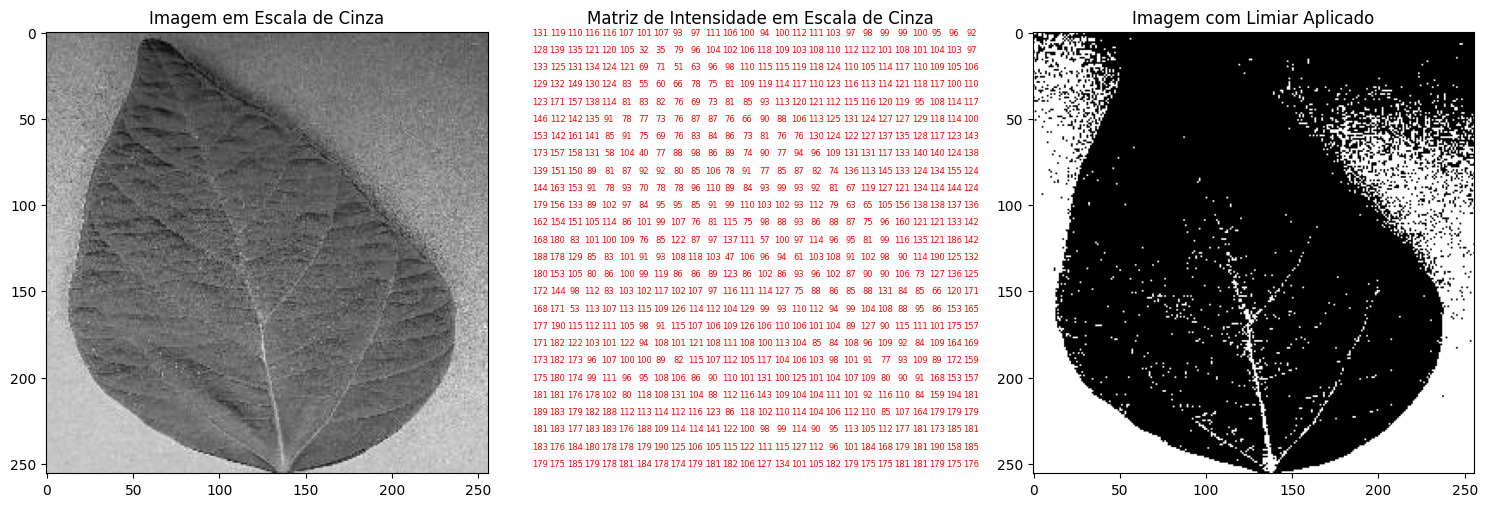

In [22]:
# Exibe a imagem original e a imagem com limiar aplicado
plt.figure(figsize=(15, 5))

# Imagem em Escala de Cinza
plt.subplot(1, 3, 1)
plt.title("Imagem em Escala de Cinza")
plt.imshow(imagem_cinza, cmap='gray')

# Matriz de Intensidade em Escala de Cinza
plt.subplot(1, 3, 2)
plt.title("Matriz de Intensidade em Escala de Cinza")
# Cria um fundo em branco para a matriz
plt.imshow(np.ones_like(imagem_cinza) * 255, cmap='gray', vmin=0, vmax=255)  # Fundo branco
for i in range(0, imagem_cinza.shape[0], 10):  # Para espaçar os valores e melhorar a visualização
    for j in range(0, imagem_cinza.shape[1], 10):
        plt.text(j, i, str(imagem_cinza[i, j]), color="red", fontsize=6, ha='center', va='center')
plt.axis('off')

# Imagem com Limiar Aplicado
plt.subplot(1, 3, 3)
plt.title("Imagem com Limiar Aplicado")
plt.imshow(thresholded_image, cmap='gray')


plt.tight_layout()
plt.show()
